In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns               # optional

%matplotlib inline

**Question 1:** Check that the gene names match.

In [64]:
# Read the two files into two Pandas DataFrames:
# Moriarty's data
# df = pd.read_csv(myfile,sep='\t',skiprows=(0,1,2),header=(0))
moriarty_df = pd.read_table('Moriarty_SuppTable1.tsv', comment='#')
moriarty_df

,gene,class,0m,3m,6m,9m,12m,15m,18m,21m,24m,27m,30m
0,fcnZ,early,5.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
1,mnsN,early,12.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
2,eqoN,middle,65.01,68.97,60.96,40.95,22.95,16.98,8.98,10.98,10.99,3.0,1.0
3,gupU,early,65.01,31.98,35.97,25.97,22.95,8.99,12.97,6.99,3.00,2.0,1.0
4,wccP,early,68.01,50.98,38.97,21.97,18.96,7.99,3.99,5.99,0.00,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395,hepQ,early,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
4396,nuzM,early,244.04,153.93,91.93,52.94,34.92,13.99,9.98,3.99,7.00,2.0,2.0
4397,dhgR,early,17.00,14.99,12.99,5.99,9.98,2.00,2.00,3.00,0.00,0.0,0.0
4398,wdkS,early,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0


In [65]:
# Adler's data
# adler_df = pd.read_csv('Adler_SuppTable2.tsv')
adler_df = pd.read_table('Adler_SuppTable2.tsv', comment = '#')
adler_df

,gene,synthesis_rate,halflife
0,lsuW,0.27,1.85
1,ilaK,0.01,0.47
2,rmwC,0.58,14.76
3,dcwO,0.28,3.12
4,ajqX,0.31,2.58
...,...,...,...
4395,jccI,0.02,3.65
4396,yauB,0.01,3.78
4397,trdL,0.30,8.19
4398,qzjQ,0.05,11.75


In [66]:
# identify the genes that appear in Moriarty's data but not Adler's:
print('Genes found in Moriarty\'s data but not Adler\'s:')

corrupted_names=list(set(moriarty_df['gene']) - set(adler_df['gene']))
print(corrupted_names)

Genes found in Moriarty's data but not Adler's:
['1-Mar', '1-Sep', '1-Dec', '1-Oct', '2-Sep', '2-Mar', '2-Oct']


In [67]:
# identify the genes that appear in Adler's data but not Moriarty's:
print('Genes found in Adler\'s data but not Moriarty\'s:')
print(list(set(adler_df['gene']) - set(moriarty_df['gene'])))

Genes found in Adler's data but not Moriarty's:
['dec1', 'sep1', 'oct2', 'mar2', 'mar1', 'oct1', 'sep2']


In [68]:
# fix any corrupted gene names in Moriarty's data, so the two lists of gene names match
moriarty_df.replace({'1-Mar': 'mar1', '2-Mar': 'mar2', '1-Sep':'sep1', '2-Sep': 'sep2', '1-Oct': 'oct1', '2-Oct': 'oct2'}, inplace=True)

In [69]:
# test to ensure that we correctly replaced the corrupted gene names
moriarty_df[moriarty_df['gene'] == 'sep1']
moriarty_df[moriarty_df['gene'] == 'mar2']

,gene,class,0m,3m,6m,9m,12m,15m,18m,21m,24m,27m,30m
689,mar2,early,146.03,101.95,88.93,62.93,33.92,34.96,40.91,24.96,17.99,15.99,3.0


**Explanation for what happened in Moriarty's names:** These gene names appear to be formmated in terms of dates, and it seems that Moriarty formatted them such that the day went first, followed by a hyphen, followed by the first two letters of the month. On the other hand, Adler formatted these gene names such that the first three characters were the first three letters of the month, followed by the date.

In [70]:
# check for NaN values
isna = moriarty_df.isna()
isna_rows = isna.any(axis=1)# axis = 0 looks over all rows, axis = 1 looks over all columns
moriarty_df.loc[isna_rows]

,gene,class,0m,3m,6m,9m,12m,15m,18m,21m,24m,27m,30m
2532,NaN,early,12.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# rename this gene to xNaN to avoid confusion 
moriarty_df.at[2532, 'gene'] = 'xNaN'

In [72]:
# check again for NaN values
isna = moriarty_df.isna()
isna_rows = isna.any(axis=1)# axis = 0 looks over all rows, axis = 1 looks over all columns
moriarty_df.loc[isna_rows]

,gene,class,0m,3m,6m,9m,12m,15m,18m,21m,24m,27m,30m


We have successfully replaced any confusing NaN values!

**Question 2:** Tidy the data.

In [73]:
# for each gene, you have Moriarty's classification ('early', 'middle', 'late'), his TPM measurements at 11 time points, 
# and Adler's synthesis and halflife data
temp = moriarty_df
temp = temp.rename(columns={'0m': '0', '3m': '3', '6m': '6', '9m': '9', '12m': '12', '15m': '15', '18m': '18', '21m': '21', '24m': '24', '27m': '27', '30m': '30'})

tidy_moriarty = pd.melt(temp, id_vars=['gene', 'class'], value_vars=['0', '3', '6', '9', '12', '15', '18', '21', '24', '27', '30'])
tidy_moriarty = tidy_moriarty.rename(columns={'variable': 'time', 'value': 'mRNA expression'})
tidy_moriarty

,gene,class,time,mRNA expression
0,fcnZ,early,0,5.00
1,mnsN,early,0,12.00
2,eqoN,middle,0,65.01
3,gupU,early,0,65.01
4,wccP,early,0,68.01
...,...,...,...,...
48395,hepQ,early,30,0.00
48396,nuzM,early,30,2.00
48397,dhgR,early,30,0.00
48398,wdkS,early,30,0.00


**Question 3:** Explore the data.

In [74]:
# output the five genes with the highest mRNA synthesis rate
highest_synth = adler_df.sort_values(by=['synthesis_rate'], ascending = False)[0:5]

print('The five genes with the highest mRNA synthesis rate (mRNA/min) are:\n',
      highest_synth['gene'].to_string(index=False))

The five genes with the highest mRNA synthesis rate (mRNA/min) are:
 uzdZ
mkqZ
pfhT
coxU
wduX


In [75]:
# output the five genes with the longest mRNA halflife
longest_halflife = adler_df.sort_values(by=['halflife'], ascending = False)[0:5]

print('The five genes with the longest mRNA halflife (min) are:\n',
      longest_halflife['gene'].to_string(index=False))

# even when expression stops, mRNA persists 

The five genes with the longest mRNA halflife (min) are:
 qonD
cxyH
znkB
qyfB
qunV


In [76]:
# output the five genes that have the highest ratio of expression at t=30' vs. t=0

# calculate the ratio of expression
moriarty_df['t30/t0_ratio'] = moriarty_df['30m'] / moriarty_df['0m']

# replace ratio values of infinity with "NaN" -- we want to ignore the rows with a value of 0 for t=0
moriarty_df.replace(np.inf, np.nan, inplace=True)

# sort in order from highest to lowest
highest_ratio = moriarty_df.sort_values(by=['t30/t0_ratio'], ascending = False)[0:5]

print('The five genes with the highest ratio of expression at t=30\' vs. t=0: \n', highest_ratio['gene'].to_string(index=False))

The five genes with the highest ratio of expression at t=30' vs. t=0: 
 qonD
znkB
cxyH
qyfB
nwoU


In [86]:
# output the five genes that have the highest ratio of expression at t=30' vs. t=15'

# calculate the ratio of expression
moriarty_df['t30/t15_ratio'] = moriarty_df['30m'] / moriarty_df['15m']

# replace ratio values of infinity with "NaN" -- we want to ignore the rows with a value of 0 for t=0
moriarty_df.replace(np.inf, np.nan, inplace=True)

# sort in order from highest to lowest
highest_ratio = moriarty_df.sort_values(by=['t30/t15_ratio'], ascending = False)[0:5]

print('The five genes with the highest ratio of expression at t=30\' vs. t=15\': \n', highest_ratio['gene'].to_string(index=False))

The five genes with the highest ratio of expression at t=30' vs. t=15': 
 shoW
gksE
nwoU
qonD
bmuE


In [87]:
print("Genes both in the list of the top 5 t30/t0 ratio as well as the top 5 longest halflifes:",
    list(set(highest_ratio['gene']).intersection(longest_halflife['gene'])))

Genes both in the list of the top 5 t30/t0 ratio as well as the top 5 longest halflifes: ['qonD']


There appears to be a high overlap between these two lists, indicating a potential correlation between halflife and ratio of expression at time 30 and time 0.

In [88]:
print("Genes both in the list of the top 5 t30/t0 ratio as well as the top 5 highest synthesis rates:",
    list(set(highest_ratio['gene']).intersection(highest_synth['gene'])))

Genes both in the list of the top 5 t30/t0 ratio as well as the top 5 highest synthesis rates: []


There appears to be no overlap between these two lists, indicating a lack of correlation between high synthesis rate and ratio of expression at time 30 and time 0. Let's test the opposite (low synthesis rate and ratio of expression).

In [89]:
# output the five genes with the lowest mRNA synthesis rate
lowest_synth = adler_df.sort_values(by=['synthesis_rate'], ascending = True)[0:5]

print('The five genes with the lowest mRNA synthesis rate (mRNA/min) are:\n',
      lowest_synth['gene'].to_string(index=False))

The five genes with the lowest mRNA synthesis rate (mRNA/min) are:
 dezI
drtR
tpyV
fxwV
hjgK


There is still no overlap between lowest mRNA synthesis rate and the ratio, so perhaps there is no correlation between synthesis rate and t30/t0 ratio. We can explore this further through visualizations in question 5.

**Question 4:** Merge the data.

In [77]:
# merge moriarty's wide data with adler's data
merged = adler_df.merge(right=moriarty_df, # DataFrame to merge with
                  on='gene' # Column (or list of columns) used for merging
                 )

# table columns: class, synth_rate, halflife, t30/t0 ratio; thus we have to drop the individual time columns
merged = merged.drop(['0m', '3m', '6m', '9m', '12m', '15m', '18m', '21m', '24m', '27m',	'30m'], axis=1)

In [78]:
# display our merged data
merged

,gene,synthesis_rate,halflife,class,t30/t0_ratio
0,lsuW,0.27,1.85,early,0.000000
1,ilaK,0.01,0.47,early,0.000000
2,rmwC,0.58,14.76,late,2.409041
3,dcwO,0.28,3.12,early,0.010415
4,ajqX,0.31,2.58,early,0.007462
...,...,...,...,...,...
4393,jccI,0.02,3.65,early,0.000000
4394,yauB,0.01,3.78,early,0.000000
4395,trdL,0.30,8.19,middle,0.817350
4396,qzjQ,0.05,11.75,middle,1.745736


**Question 5:** Figure out the explanation

Using the merged data frame, and the original frames too as needed, explore the data, however you want, making whatever plots you want to illustrate points you think are important.

What do you think is a more plausible biochemical explanation for why some genes appear to be upregulated in Moriarty's RNA-seq experiments?

In [37]:
merged.sort_values(by=['halflife'], ascending = True)[0:5]

,gene,synthesis_rate,halflife,class,t30/t0_ratio
4003,xwyX,0.57,0.14,early,0.0
242,mdyP,0.06,0.22,early,0.0
1513,rncK,0.44,0.26,early,0.0
4099,qvjN,0.08,0.27,early,0.0
1129,snlV,0.19,0.29,early,0.0


Text(0.5, 1.0, 'Frequency of Gene Classes')

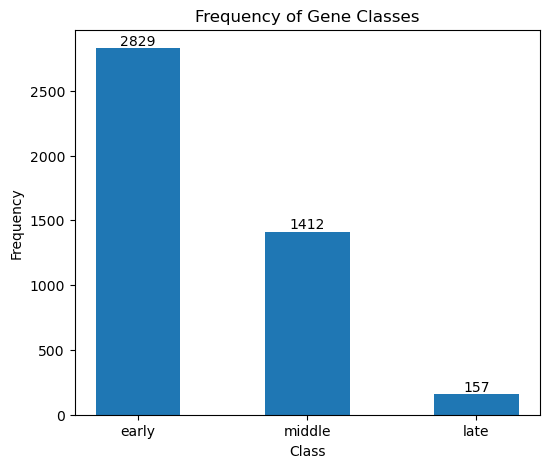

In [55]:
# bar plot of gene classes
fig, ax = plt.subplots(figsize = (6,5))

classes = ['early', 'middle', 'late']
bars = ax.bar(classes, merged['class'].value_counts(), 0.5)
ax.bar_label(bars)
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Gene Classes')

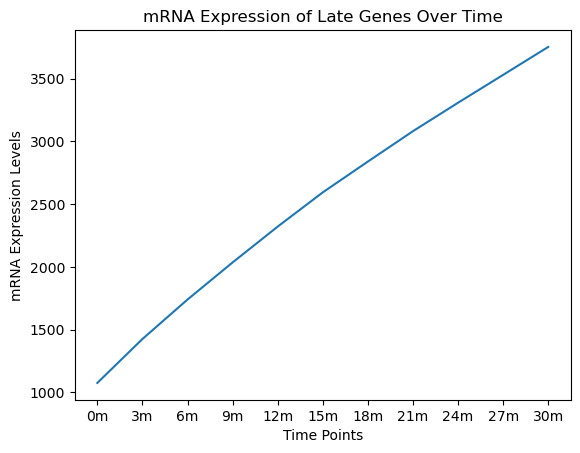

In [121]:
# create a line plot for the 'late' genes and observe their levels of mRNA expression over the time points
late_gene_expression = moriarty_df[moriarty_df['class'] == 'late']
late_gene_expression
time_points = ['0m', '3m', '6m', '9m', '12m', '15m', '18m', '21m', '24m', '27m', '30m']

averages = []

for time in time_points:
    averages.append(late_gene_expression[time].mean())    

# plotting
plt.plot(time_points, averages)
plt.xlabel('Time Points')
plt.ylabel('mRNA Expression Levels')
plt.title('mRNA Expression of Late Genes Over Time')
plt.show()

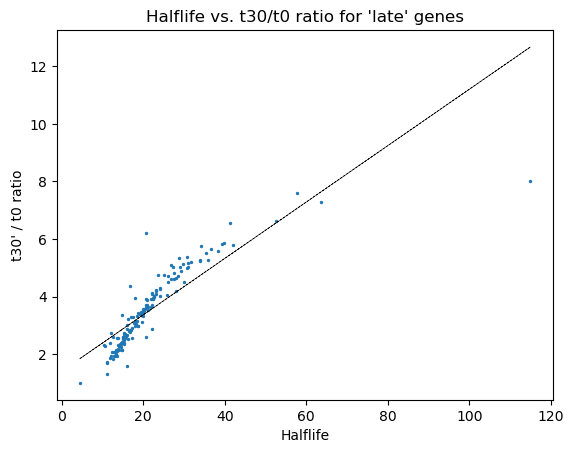

In [104]:
# plot halflife vs. t30/t0 ratio for late genes
fig, ax = plt.subplots()

x = merged[merged['class'] == 'late']['halflife']
y = merged[merged['class'] == 'late']['t30/t0_ratio']

ax.scatter(x, y, s = 2)
ax.set_xlabel('Halflife')
ax.set_ylabel('t30\' / t0 ratio')
ax.set_title('Halflife vs. t30/t0 ratio for \'late\' genes')

# fit a linear regression line
m, b = np.polyfit(x, y, 1)

# plot the line of best fit
ax.plot(x, m * x + b, color='black', linewidth = 0.5, linestyle='dashed')

There appears to be a positive correlation between halflife and the t30/t0 ratio calculated. 

Since there appears to be a strong correlation between halflife and t3/t0, let's construct a violin plot for these two variables for the three different classes.

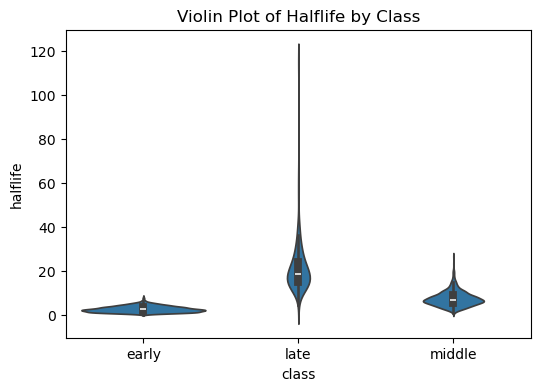

In [126]:
# create violin plot
fig, ax = plt.subplots(figsize=(6, 4))
sns.violinplot(x="class", y="halflife", data=merged, ax=ax)

# show the plot
ax.set_title('Violin Plot of Halflife by Class')
plt.show()

Text(0.5, 1.0, "Synthesis Rate vs. t30/t0 ratio for 'early' genes")

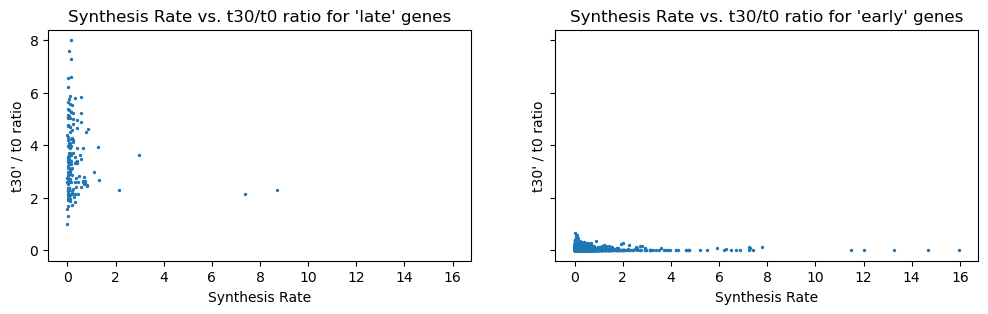

In [114]:
# look at the lack of overlap between high synthesis rate and t30'/t0 ratio

# plot synthesis rate vs. t30/t0 ratio for late genes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,3), sharey=True, sharex=True)

x = merged[merged['class'] == 'late']['synthesis_rate']
y = merged[merged['class'] == 'late']['t30/t0_ratio']

ax1.scatter(x, y, s = 2)
ax1.set_xlabel('Synthesis Rate')
ax1.set_ylabel('t30\' / t0 ratio')
ax1.set_title('Synthesis Rate vs. t30/t0 ratio for \'late\' genes')

a = merged[merged['class'] == 'early']['synthesis_rate']
b = merged[merged['class'] == 'early']['t30/t0_ratio']

ax2.scatter(a, b, s = 2)
ax2.set_xlabel('Synthesis Rate')
ax2.set_ylabel('t30\' / t0 ratio')
ax2.set_title('Synthesis Rate vs. t30/t0 ratio for \'early\' genes')

These are some interesting plots -- it seems that for late genes, the rate of synthesis is quite low except for a few outliers, but the t30/t0 ratios are higher. For early genes, the scatter is concentrated towards the bottom left of the graph, but there are more genes with a higher synthesis rate compared to in late genes (and also a high synthesis rate for early genes in relation to t30/t0 ratio).

**Explanation for Moriarty's data:** 

Expression level measured in TPM is a measure of the relative abundance: it is the number of transcripts of a given gene (numerator) divided by the total number of transcripts measured * a million (denominator). 

The halflife indicates how long mRNA remains (length of time that the mRNA exists for) after it was expressed. 

Therefore, if a gene produces mRNA with a long halflife, the number of transcripts of that gene will remain constant until for a longer time (the numerator) while the total number of transcripts will decrease (denominator), causing expression level (TPM) to increase with time in Moriarty's graphs. Because 'early' genes make up a larger proportion of the genes that we examined, and they degrade faster or have a shorter halflife, the denominator decreases significantly with time as these 'early' genes degrade. The 'late' genes also have a longer halflife, which explains why the 'late' genes display a larger t30/t0 ratio. 

Moriarty is not recording TPM for longer time points (exceeding the long half-lives of these 'late' genes). Therefore, Moriarty's analysis is obscuring what occurs in expression levels (TPM) after the mRNA is degraded for these genes. 

In [128]:
import watermark
%load_ext watermark
%watermark -v -m -p numpy,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.12.5
IPython version      : 8.27.0

numpy     : 2.1.1
matplotlib: 3.9.2

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 21.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

